<a href="https://colab.research.google.com/github/LennRBriones/neural-networks-practices/blob/main/multiple_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
from keras import layers, models
from keras.datasets import reuters #the dataset of news

In [23]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
                                                                ## Using the 10,000 most common words

In [24]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

Here the dataset gave us a code for that words, we need to ise a dictionary to tranform that code to words

In [25]:
word_index = reuters.get_word_index()
word_index = dict([(value,key) for (key,value) in word_index.items()])
for i in train_data[0]:
    print(word_index.get(i-3))

None
None
None
said
as
a
result
of
its
december
acquisition
of
space
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
rental
operation
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
flow
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


In [26]:
train_labels[0] #here we can see that the output could be 3 outputs

3

In [27]:
train_data.shape

(8982,)

Here we can see a common problem, the dataset is not a tensor, so we need change it

In [28]:
## Vectorization help us to dimention the tenser
def vectorization(sequences, dim=10000):
    results = np.zeros((len(sequences),dim))
    for j, sequences in enumerate(sequences):
        results[j,sequences]=1
    return results

In [29]:
x_train = vectorization(train_data)
x_test = vectorization(test_data)

In [30]:
#Here exist the problem with te structure, we need one hot encoding to make it categorical 
train_labels[0]

3

In [31]:
from keras.utils import to_categorical #here is needed categorical because we are working
                                       # with classification

In [32]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [33]:
y_train[0]
#this structure is as a tensor, thats what we need 
#(As you see, at te begining we use [0] and we get a 3, now as array te number 1 is at position 3)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [45]:
model = models.Sequential()
#first layers         # 64 neurons     #relu as usual in hidden layers
model.add(layers.Dense(64, activation="relu", input_shape = (10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax")) #Instead Sigmoid we use softmax that help us with multiple outputs
                #46 because we have 46 possible outputs



In [46]:
model.compile(optimizer="rmsprop",
              loss ="categorical_crossentropy", #this help us in categorical, multiple outputs
              metrics = ["accuracy"]) 

In [36]:
#separating our variaton set
x_val = x_train[:1000]
partial_x_train = x_train[1000:] #here is the opossitive

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

## Training 

In [37]:
history = model.fit(partial_x_train, partial_y_train,
          epochs=30,
          batch_size = 512, #lote data
          validation_data=(x_val,y_val)) #validation

Epoch 1/30
16/16 [==============================] - 1s 32ms/step - loss: 2.5173 - accuracy: 0.4957 - val_loss: 1.7269 - val_accuracy: 0.6380
Epoch 2/30
16/16 [==============================] - 0s 16ms/step - loss: 1.4827 - accuracy: 0.6891 - val_loss: 1.3579 - val_accuracy: 0.7020
Epoch 3/30
16/16 [==============================] - 0s 18ms/step - loss: 1.1622 - accuracy: 0.7523 - val_loss: 1.1940 - val_accuracy: 0.7440
Epoch 4/30
16/16 [==============================] - 0s 17ms/step - loss: 0.9536 - accuracy: 0.7984 - val_loss: 1.0961 - val_accuracy: 0.7650
Epoch 5/30
16/16 [==============================] - 0s 19ms/step - loss: 0.7901 - accuracy: 0.8345 - val_loss: 1.0152 - val_accuracy: 0.7790
Epoch 6/30
16/16 [==============================] - 0s 17ms/step - loss: 0.6549 - accuracy: 0.8598 - val_loss: 0.9379 - val_accuracy: 0.7950
Epoch 7/30
16/16 [==============================] - 0s 17ms/step - loss: 0.5416 - accuracy: 0.8851 - val_loss: 0.9214 - val_accuracy: 0.8100
Epoch 8/30
16

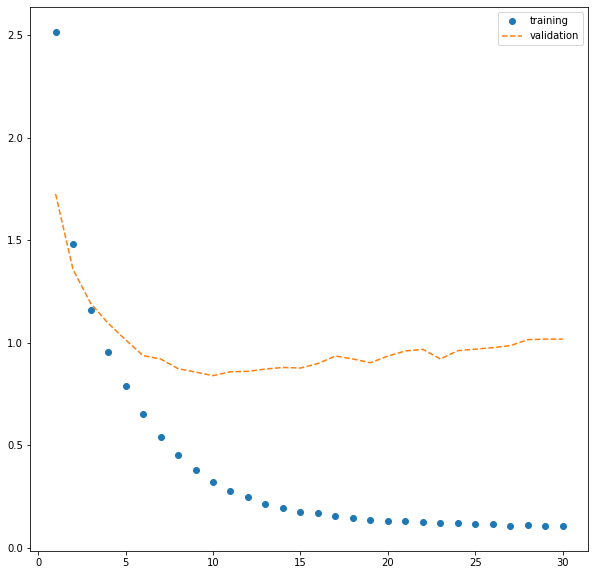

In [38]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

fig = plt.figure(figsize=(10,10)) #now we have 30 epochs, to better image we changed the view
epoch = range (1, len(loss_values) +1)
plt.plot(epoch, loss_values, "o", label = "training")
plt.plot(epoch, val_loss_values, "--", label = "validation")
plt.legend()
plt.show()

In [39]:
history_dict

{'loss': [2.5173447132110596,
  1.4827297925949097,
  1.162196159362793,
  0.9536256194114685,
  0.7901091575622559,
  0.6549455523490906,
  0.5415552258491516,
  0.4513292610645294,
  0.3787875175476074,
  0.31890326738357544,
  0.27548807859420776,
  0.24634037911891937,
  0.2121003419160843,
  0.1927832067012787,
  0.17324894666671753,
  0.1673903912305832,
  0.155941441655159,
  0.1471911072731018,
  0.1349361538887024,
  0.12936821579933167,
  0.1292191445827484,
  0.12422146648168564,
  0.12036161124706268,
  0.11869865655899048,
  0.11607211083173752,
  0.1138976588845253,
  0.10606912523508072,
  0.11018271744251251,
  0.10809263586997986,
  0.105838842689991],
 'accuracy': [0.4957404136657715,
  0.6890503764152527,
  0.7523177266120911,
  0.7984214425086975,
  0.834502637386322,
  0.8598095774650574,
  0.8851165175437927,
  0.9039087891578674,
  0.9218240976333618,
  0.9334753155708313,
  0.9376096129417419,
  0.943497896194458,
  0.950889527797699,
  0.9513906240463257,
  0.9

Checking accuracy

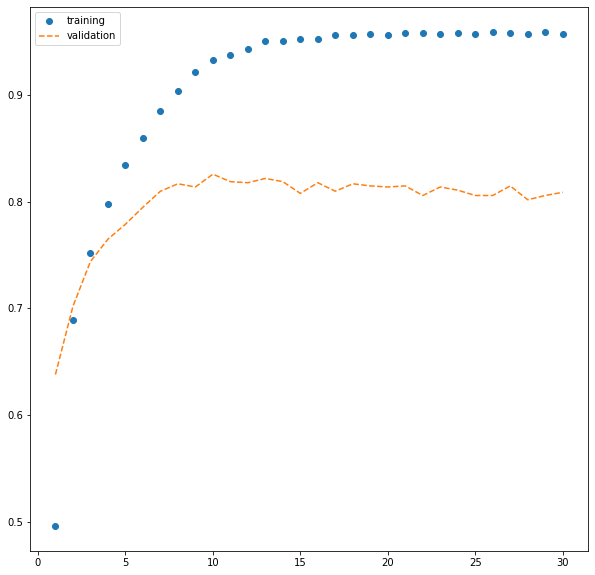

In [40]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]

fig = plt.figure(figsize=(10,10)) #now we have 30 epochs, to better image we changed the view
epoch = range (1, len(loss_values) +1)
plt.plot(epoch, loss_values, "o", label = "training")
plt.plot(epoch, val_loss_values, "--", label = "validation")
plt.legend()
plt.show()

the accuracy in the training is learning very well, getting a 100, perhaps the validation data is getting stuck in certain point 

In [41]:
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.1167 - accuracy: 0.7947


[1.116707444190979, 0.7947462201118469]

The acuracy looks well, but the problem is te validation data, around the epoch 10 had the best data, so we can try doing the model with only 10 to get a little better results

## Trying with less epoch 
 this to reduce the cpu usage & innecesary iterations

(REMEMBER: the cache could be a problem, so if you want to try with different epochs you need to run again the model and the compiler, then you can do the training with less or more e
epochs

In [47]:
history = model.fit(partial_x_train, partial_y_train,
          epochs=10,
          batch_size = 512, #lote data
          validation_data=(x_val,y_val)) #validation

Epoch 1/10
16/16 [==============================] - 1s 32ms/step - loss: 2.4885 - accuracy: 0.5322 - val_loss: 1.6728 - val_accuracy: 0.6250
Epoch 2/10
16/16 [==============================] - 0s 17ms/step - loss: 1.4564 - accuracy: 0.6770 - val_loss: 1.3223 - val_accuracy: 0.6960
Epoch 3/10
16/16 [==============================] - 0s 19ms/step - loss: 1.1579 - accuracy: 0.7335 - val_loss: 1.1760 - val_accuracy: 0.7380
Epoch 4/10
16/16 [==============================] - 0s 20ms/step - loss: 0.9709 - accuracy: 0.7798 - val_loss: 1.0810 - val_accuracy: 0.7610
Epoch 5/10
16/16 [==============================] - 0s 18ms/step - loss: 0.8195 - accuracy: 0.8196 - val_loss: 1.0150 - val_accuracy: 0.7710
Epoch 6/10
16/16 [==============================] - 0s 16ms/step - loss: 0.6890 - accuracy: 0.8475 - val_loss: 0.9535 - val_accuracy: 0.7930
Epoch 7/10
16/16 [==============================] - 0s 20ms/step - loss: 0.5774 - accuracy: 0.8765 - val_loss: 0.9072 - val_accuracy: 0.8100
Epoch 8/10
16

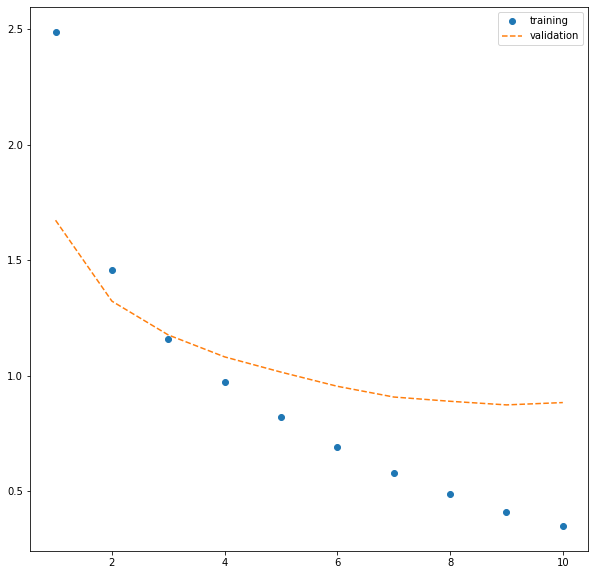

In [48]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

fig = plt.figure(figsize=(10,10)) #now we have 30 epochs, to better image we changed the view
epoch = range (1, len(loss_values) +1)
plt.plot(epoch, loss_values, "o", label = "training")
plt.plot(epoch, val_loss_values, "--", label = "validation")
plt.legend()
plt.show()

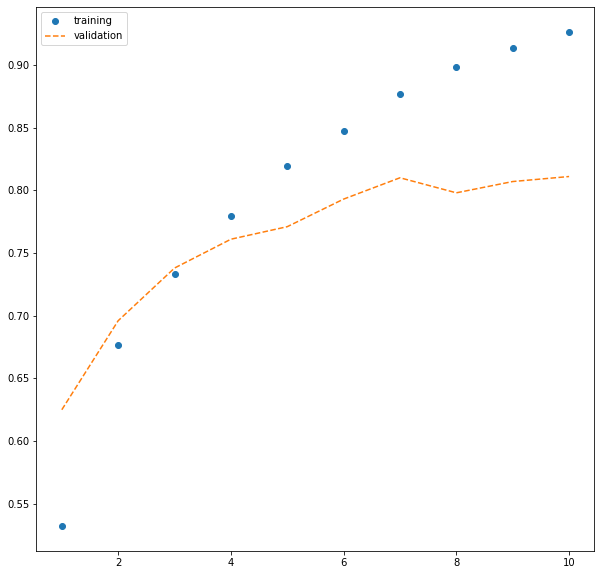

In [49]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]

fig = plt.figure(figsize=(10,10)) #now we have 30 epochs, to better image we changed the view
epoch = range (1, len(loss_values) +1)
plt.plot(epoch, loss_values, "o", label = "training")
plt.plot(epoch, val_loss_values, "--", label = "validation")
plt.legend()
plt.show()

In [50]:
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 4ms/step - loss: 0.9392 - accuracy: 0.7881


[0.9391699433326721, 0.7880676984786987]

## Making predictions

In [53]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [54]:
predictions[0]

array([9.6858101e-05, 2.6372223e-05, 1.7264172e-06, 9.7624296e-01,
       1.7896777e-02, 2.3242430e-06, 1.0302038e-04, 9.2231494e-05,
       1.7379601e-03, 6.9130947e-06, 3.9944653e-06, 5.6717900e-04,
       3.3688953e-05, 3.6090754e-05, 1.0381562e-04, 1.9634392e-05,
       2.6942001e-04, 6.6545406e-05, 3.2959368e-05, 3.8017039e-04,
       7.6139841e-04, 7.8457830e-05, 1.5093741e-05, 7.4773518e-05,
       4.0207240e-05, 1.9535930e-04, 9.6211727e-07, 1.6533947e-04,
       4.8959928e-06, 3.8764789e-04, 5.7394082e-05, 3.3113720e-05,
       1.8955080e-07, 2.1327883e-06, 5.0265785e-06, 2.8422184e-05,
       5.2694148e-05, 1.9250037e-05, 7.6192059e-06, 2.7929858e-04,
       1.2951402e-05, 3.0726173e-05, 1.2065473e-05, 4.8743809e-06,
       7.3054298e-06, 2.0175894e-06], dtype=float32)

here we are viewing a layer with 46 neurons, that means 46 possible results and everyone have their weight

In [55]:
np.sum(predictions[0]) ## as we can see the sum is almost 1

0.9999998

In [56]:
np.argmax(predictions[0]) #showing us which position is the higher 

3

## Training with regularizers & dropout to get better results

In [57]:
from keras import regularizers

In [58]:
model2 = models.Sequential()
model2.add(layers.Dense(64, activation="relu", input_shape=(10000,)
                       ,kernel_regularizer=regularizers.l2(0.0001)))
model2.add(layers.Dropout(0.3))
model2.add(layers.Dense(64, activation="relu",
                        kernel_regularizer=regularizers.l1_l2(0.0001, 0.001)))

model2.add(layers.Dense(46, activation="softmax"))

In [60]:
model2.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [61]:
history2 = model2.fit(partial_x_train, partial_y_train,
                      epochs=17,
                      batch_size=512,
                      validation_data=(x_val, y_val))

Epoch 1/17
16/16 [==============================] - 1s 32ms/step - loss: 2.9769 - accuracy: 0.4509 - val_loss: 2.0339 - val_accuracy: 0.5910
Epoch 2/17
16/16 [==============================] - 0s 20ms/step - loss: 1.8013 - accuracy: 0.6384 - val_loss: 1.5697 - val_accuracy: 0.6680
Epoch 3/17
16/16 [==============================] - 0s 19ms/step - loss: 1.4571 - accuracy: 0.6954 - val_loss: 1.3858 - val_accuracy: 0.7140
Epoch 4/17
16/16 [==============================] - 0s 18ms/step - loss: 1.2693 - accuracy: 0.7342 - val_loss: 1.2683 - val_accuracy: 0.7410
Epoch 5/17
16/16 [==============================] - 0s 24ms/step - loss: 1.1300 - accuracy: 0.7716 - val_loss: 1.1927 - val_accuracy: 0.7650
Epoch 6/17
16/16 [==============================] - 0s 22ms/step - loss: 1.0145 - accuracy: 0.7954 - val_loss: 1.1445 - val_accuracy: 0.7750
Epoch 7/17
16/16 [==============================] - 0s 21ms/step - loss: 0.9244 - accuracy: 0.8192 - val_loss: 1.0982 - val_accuracy: 0.7920
Epoch 8/17
16

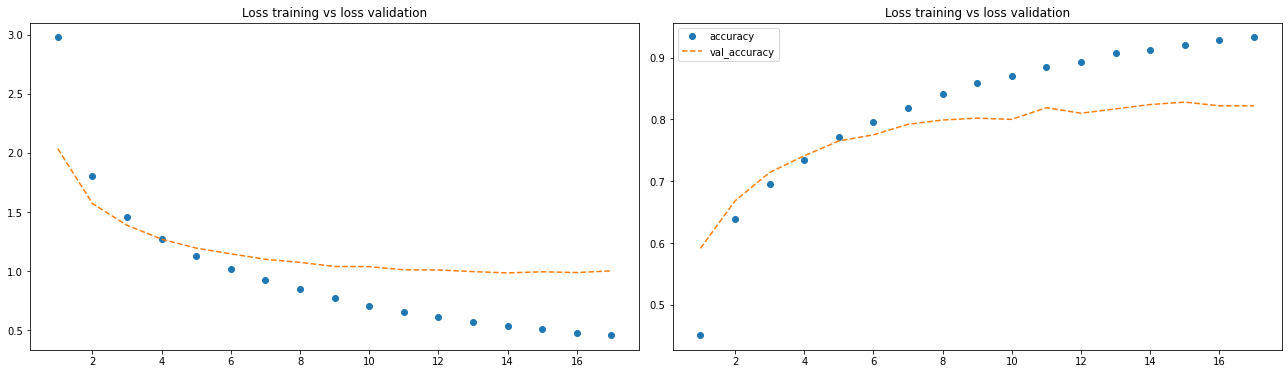

In [62]:
history2_dict = history2.history
loss_values = history2_dict["loss"]
val_loss_values = history2_dict["val_loss"]
epoch = range(1,len(loss_values)+1)
accuracy = history2_dict["accuracy"]
val_accuracy = history2_dict["val_accuracy"]

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(2,2,1)
plt.plot(epoch, loss_values, "o", label="train")
plt.plot(epoch, val_loss_values, "--", label="validation")
plt.title("Loss training vs loss validation")

ax = fig.add_subplot(2,2,2)
epoch = range(1,len(loss_values)+1)
plt.plot(epoch, accuracy, "o", label="accuracy")
plt.plot(epoch, val_accuracy, "--", label="val_accuracy")
plt.title("Loss training vs loss validation")

plt.legend()
plt.tight_layout()

In [65]:
model2.evaluate(x_test,y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.1127 - accuracy: 0.7961


[1.1127276420593262, 0.7960819005966187]